# Objective :
    
## Showcase the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
loan_data = pd.read_csv('loan.csv')

/var/folders/gy/qnsjgg290zd4bj07_ndrqgg00000gn/T/ipykernel_25487/2898063344.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


In [6]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [8]:
loan_data.shape

(39717, 111)

In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Dataset Overview:
1. Total records: 39717
2. Total columns: 111
3. Data Types: 74 Numeric, 13 Integer, 24 Categorical

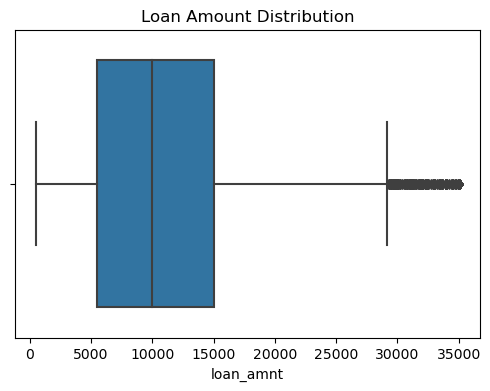

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=loan_data, x='loan_amnt')
plt.title('Loan Amount Distribution')
plt.show()

In [15]:
min(loan_data['loan_amnt'])

500

In [16]:
max(loan_data['loan_amnt'])

35000

The minimum loan amount is 500 USD where as the maximum amount is 35000 USD however most of the loan amounts are between 5000 USD to 15000 USD as per the boxplot

In [17]:
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

The loan_status field helps us to classify loans as Risky -"Charged Off" of Safe -"Fully Paid". we need to understand the underlying reasons of 5627 charged off or defaulted loans as per the below count plot.

### Visualize target variable

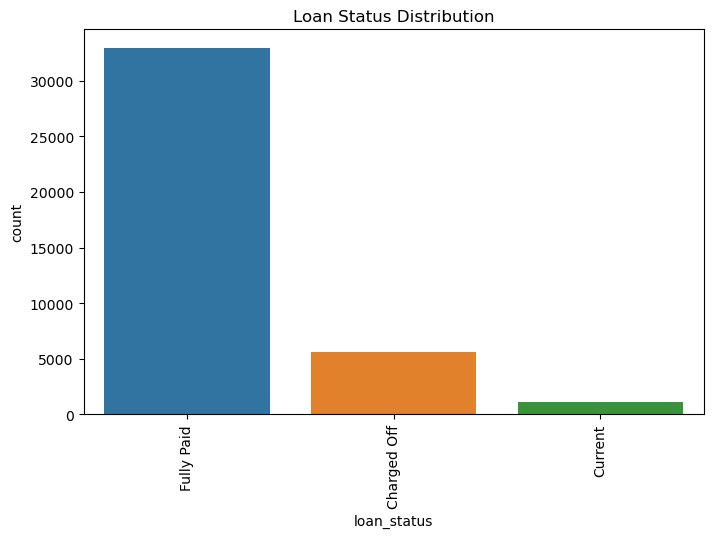

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=loan_data, order=loan_data['loan_status'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Loan Status Distribution")
plt.show()

In [19]:
data_dict = pd.read_excel('Data_Dictionary.xlsx')

In [20]:
data_dict.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...


Data Dictionary describes each field in loan dataset

In [21]:
data_dict.shape

(117, 2)

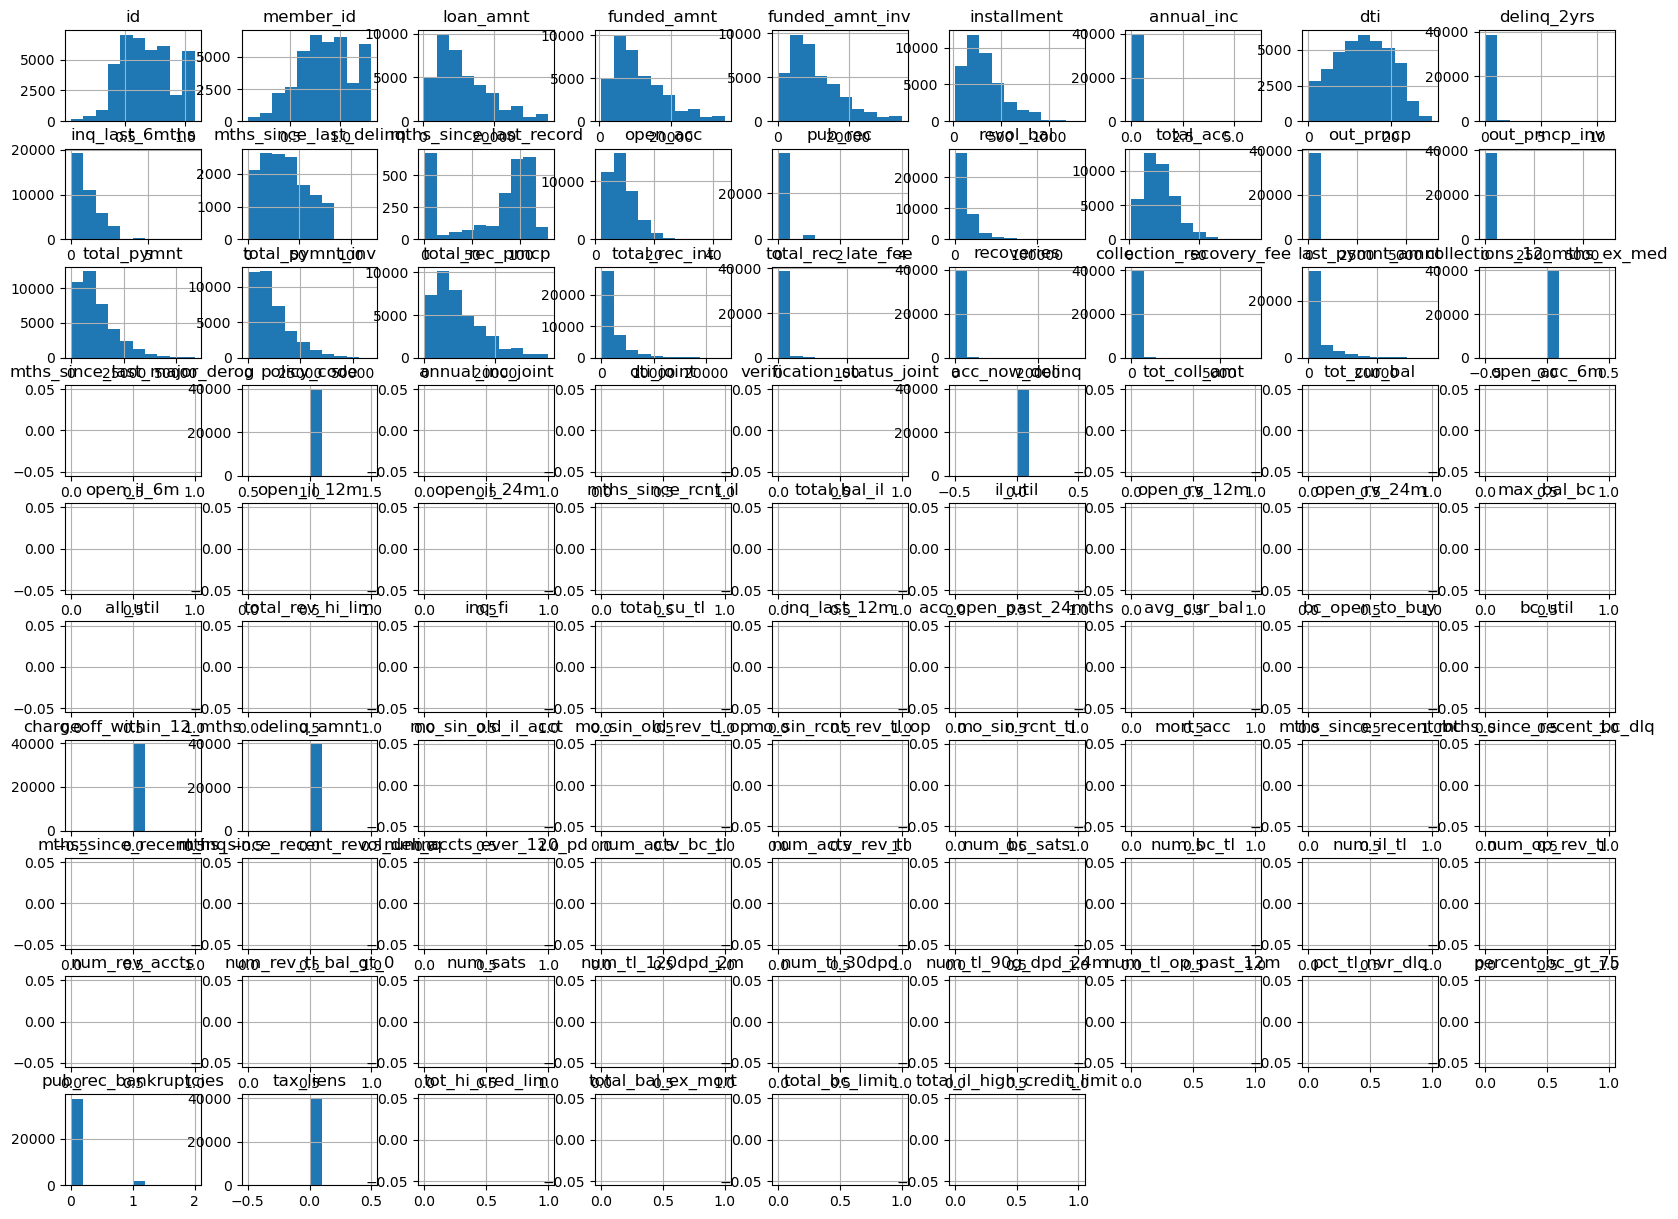

In [24]:
loan_data.hist(figsize=(20,15))
plt.show()

### Clean target variable: Focus on charged off and defaulted loans

In [25]:
target_conditions = ['Charged Off', 'Default']
loan_data['is_default'] = loan_data['loan_status'].apply(lambda x: 1 if x in target_conditions else 0)


### Handle key numerical variables

In [28]:
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float')
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float')

In [29]:
min(loan_data['int_rate'])

5.42

In [30]:
max(loan_data['int_rate'])

24.59

In [36]:
loan_data['int_rate'].mean()

12.02117657426169

The minimum interest rate is 5.42 and maximum is 24.59 and mean is 12.02

In [31]:
# Analyze correlations with loan default
corr_matrix = loan_data.corr()
default_corr = corr_matrix['is_default'].sort_values(ascending=False)

print("\nTop 10 Correlations with Loan Default:")
print(default_corr.head(10))



Top 10 Correlations with Loan Default:
is_default                 1.000000
recoveries                 0.340297
collection_recovery_fee    0.205394
int_rate                   0.196253
total_rec_late_fee         0.163221
revol_util                 0.096560
inq_last_6mths             0.071717
mths_since_last_record     0.058174
pub_rec                    0.050880
loan_amnt                  0.048217
Name: is_default, dtype: float64


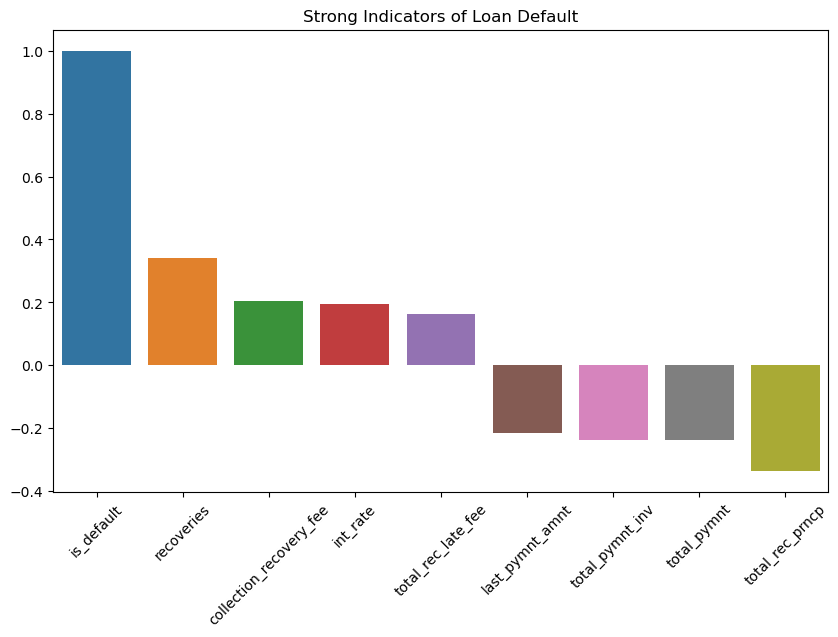

In [32]:
strong_corr = default_corr[abs(default_corr) > 0.1]
plt.figure(figsize=(10, 6))
sns.barplot(x=strong_corr.index, y=strong_corr.values)
plt.xticks(rotation=45)
plt.title("Strong Indicators of Loan Default")
plt.show()

## Key Indicators of Default:

### Features with the strongest correlations to defaults include:

Recoveries (correlation: 0.34): Amount recovered from charged-off loans.
    
Collection Recovery Fee (0.21): Fees collected for recovery.
    
Interest Rate (0.20): Higher interest rates correlate with higher default risk.
    
Total Late Fee (0.16): Borrowers with late fees are more likely to default.
    
Revolving Utilization Rate (0.10): Higher utilization indicates greater risk.


# Key Insights


## 1. Interest Rates

#### Analyze the relationship between interest rates and loan default risk

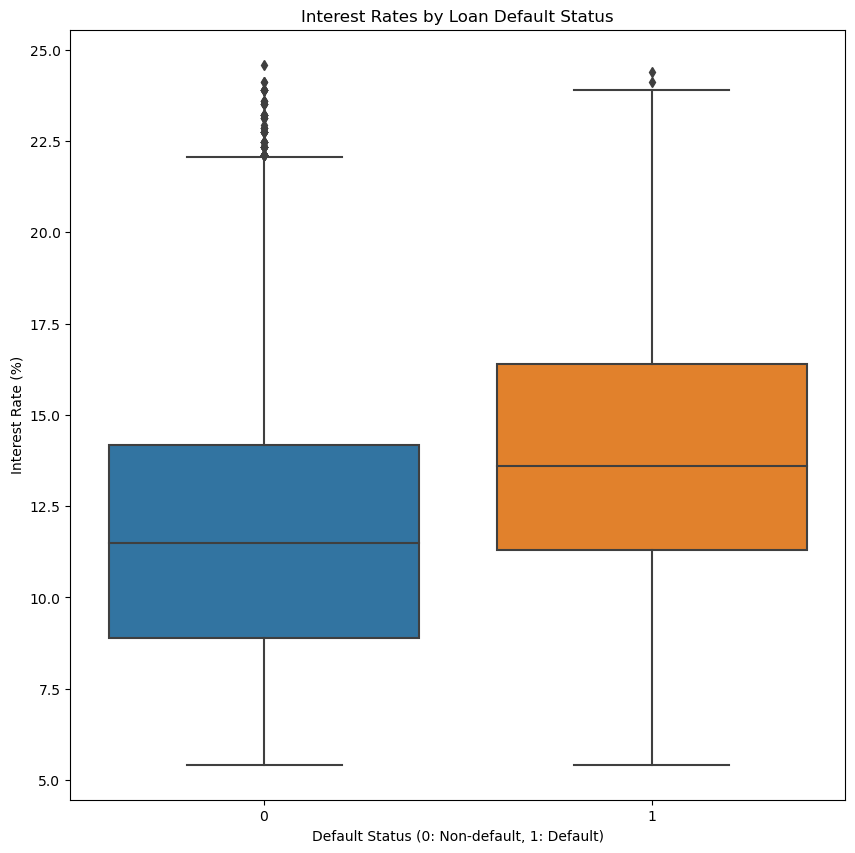

In [33]:
plt.figure(figsize=(10, 10))
# Create a boxplot of interest rates for default vs non-default loans
sns.boxplot(x='is_default', y='int_rate', data=loan_data)
plt.title("Interest Rates by Loan Default Status")
plt.xlabel("Default Status (0: Non-default, 1: Default)")
plt.ylabel("Interest Rate (%)")
plt.show()


In [34]:
# Calculate average interest rates for default vs non-default loans
default_int_rate_mean = loan_data.groupby('is_default')['int_rate'].mean()
print("\nAverage Interest Rate by Default Status:")
print(default_int_rate_mean)


Average Interest Rate by Default Status:
is_default
0    11.724186
1    13.820432
Name: int_rate, dtype: float64


#### Higher interest rates are likely associated with higher default risks. as per the above diagram

Boxplot Visualization:

Defaulted loans generally have higher interest rates compared to non-defaulted loans.

Average Interest Rates:

Non-defaulted loans: Average interest rate is 11.72%.
Defaulted loans: Average interest rate is significantly higher at 13.82%.


## 2.  Debt-to-Income Ratio (dti):

In [37]:
max(loan_data['dti'])

29.99

In [38]:
min(loan_data['dti'])

0.0

In [39]:
loan_data['dti'].mean()

13.315129541506161

In [40]:
loan_data['dti'].median()

13.4

Median: 13.4 with a max of 29.99.

Borrowers with high DTI may be at greater risk of default.

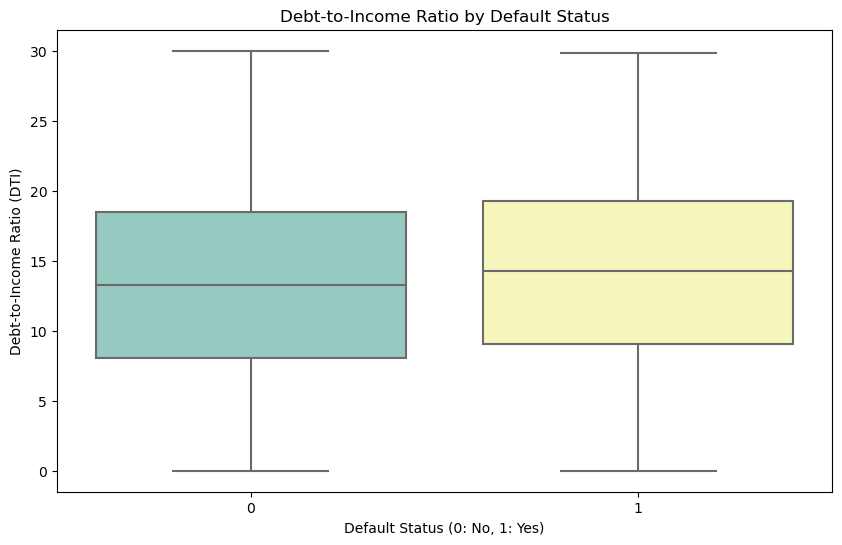


Average Debt-to-Income Ratio by Default Status:
is_default
0    13.201980
1    14.000624
Name: dti, dtype: float64


In [48]:
# Analyze the relationship between Debt-to-Income Ratio (DTI) and default rates
plt.figure(figsize=(10, 6))

# Create a boxplot for DTI grouped by default status
sns.boxplot(x='is_default', y='dti', data=loan_data, palette="Set3")
plt.title("Debt-to-Income Ratio by Default Status")
plt.xlabel("Default Status (0: No, 1: Yes)")
plt.ylabel("Debt-to-Income Ratio (DTI)")
plt.show()

# Calculate average DTI for defaulted and non-defaulted loans
avg_dti = loan_data.groupby('is_default')['dti'].mean()
print("\nAverage Debt-to-Income Ratio by Default Status:")
print(avg_dti)

## 3. Annual Income (annual_inc):

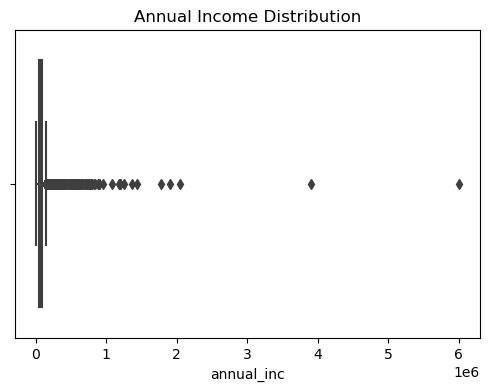

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(data=loan_data, x='annual_inc')
plt.title('Annual Income Distribution')
plt.show()

In [46]:
min_an_ic = min(loan_data['annual_inc'])
max_an_ic = max(loan_data['annual_inc'])

print('Minimum Annual Income:')
print(min_an_ic)
print('Maximum Annual Income')
print(max_an_ic)
print('Median')
print(loan_data['annual_inc'].median)


Minimum Annual Income:
4000.0
Maximum Annual Income
6000000.0
Median
<bound method NDFrame._add_numeric_operations.<locals>.median of 0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64>
<bound method NDFrame._add_numeric_operations.<locals>.mean of 0         24000.0
1         30000.0
2         12252.0
3         49200.0
4         80000.0
           ...   
39712    110000.0
39713     18000.0
39714    100000.0
39715    200000.0
39716     22000.0
Name: annual_inc, Length: 39717, dtype: float64>


Minimum: 4,000 USD with extreme  outliers  up to 6,000,000 USD unable to understand the defaulting conditions pertaining to annual income

## 4. Revolving Utilization (revol_util):



Median: 49.3% with a max of 99.9%.

Indicates a borrower’s credit utilization, which may signal financial stress.

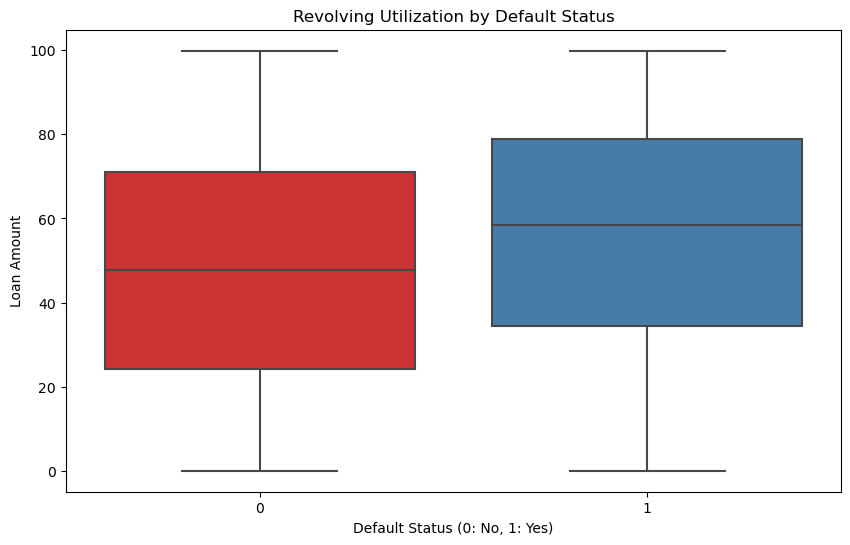


 Average Revolving Utilization by Default Status:
is_default
0    47.72169
1    55.57211
Name: revol_util, dtype: float64


In [54]:
# Analyze the relationship between Revolving Utilization  and default rates
plt.figure(figsize=(10, 6))

# Create a boxplot for DTI grouped by default status
sns.boxplot(x='is_default', y='revol_util', data=loan_data, palette="Set1")
plt.title("Revolving Utilization by Default Status")
plt.xlabel("Default Status (0: No, 1: Yes)")
plt.ylabel("Loan Amount")
plt.show()

# Calculate average DTI for defaulted and non-defaulted loans
avg_revol_util = loan_data.groupby('is_default')['revol_util'].mean()
print("\n Average Revolving Utilization by Default Status:")
print(avg_revol_util)

## 5. Loan Amount (loan_amnt):



Median: 10,000 USD with a max of 35,000.USD

Larger loans could indicate higher risk.

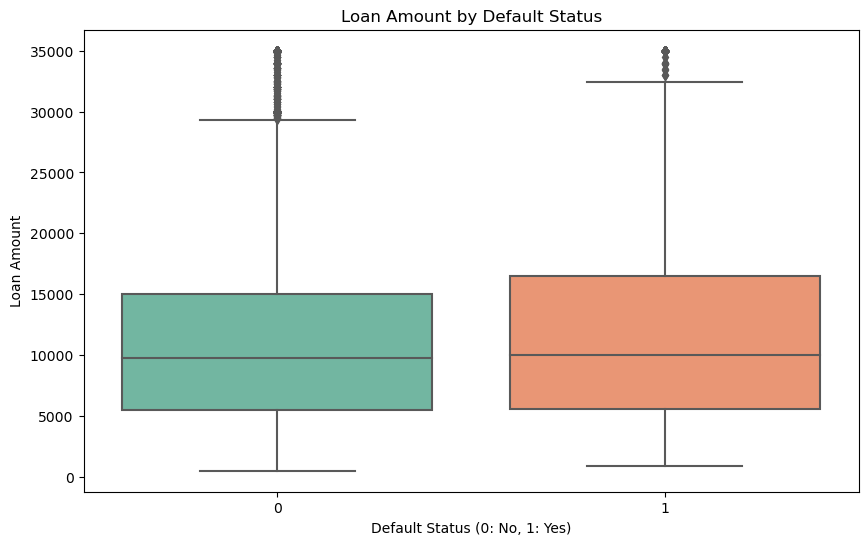


 Average Loan Amount by Default Status:
is_default
0    11073.372690
1    12104.385108
Name: loan_amnt, dtype: float64


In [55]:
# Analyze the relationship between Loan Amolunt and default rates
plt.figure(figsize=(10, 6))

# Create a boxplot for DTI grouped by default status
sns.boxplot(x='is_default', y='loan_amnt', data=loan_data, palette="Set2")
plt.title("Loan Amount by Default Status")
plt.xlabel("Default Status (0: No, 1: Yes)")
plt.ylabel("Loan Amount")
plt.show()

# Calculate average DTI for defaulted and non-defaulted loans
avg_loan_amount = loan_data.groupby('is_default')['loan_amnt'].mean()
print("\n Average Loan Amount by Default Status:")
print(avg_loan_amount)

# Categorical Variables:

## 1. Grade:

#### Grades range from A to G, with most loans in grades B and A.
#### Lower grades (e.g., F, G) likely have higher default rates.

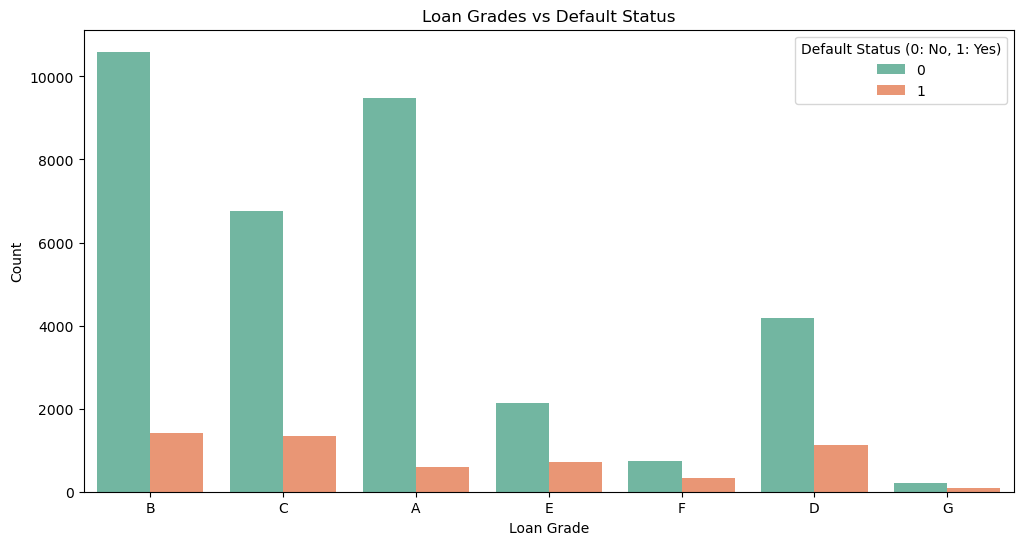


Default Rates by Loan Grade (%):
grade
A     5.969261
B    11.855241
C    16.633737
D    21.066516
E    25.158339
F    30.409914
G    31.962025
Name: is_default, dtype: float64


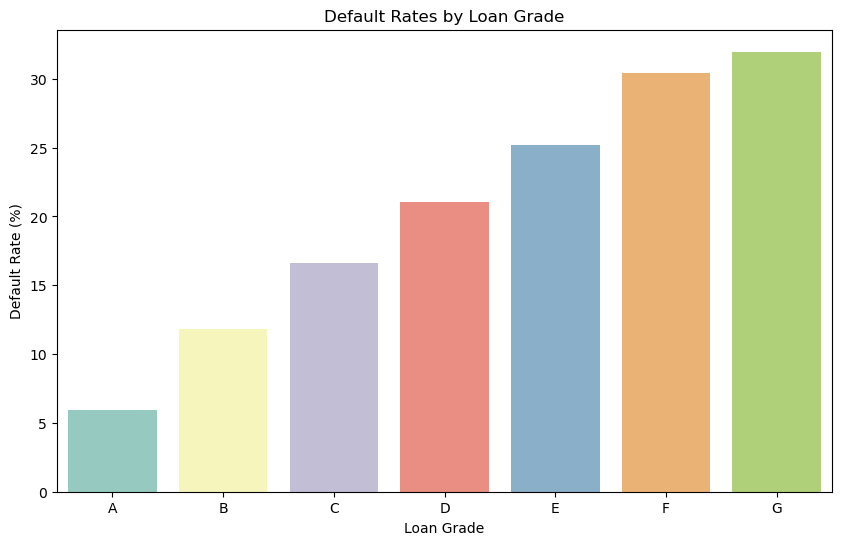

In [56]:
plt.figure(figsize=(12, 6))

# Create a countplot for grades with default status as hue
sns.countplot(x='grade', hue='is_default', data=loan_data, palette="Set2")
plt.title("Loan Grades vs Default Status")
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.legend(title="Default Status (0: No, 1: Yes)")
plt.show()

# Calculate default rate by grade
grade_default_rate = loan_data.groupby('grade')['is_default'].mean() * 100
print("\nDefault Rates by Loan Grade (%):")
print(grade_default_rate)

# Visualize default rates by grade
plt.figure(figsize=(10, 6))
sns.barplot(x=grade_default_rate.index, y=grade_default_rate.values, palette="Set3")
plt.title("Default Rates by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Default Rate (%)")
plt.show()

# 2. Sub-grade:


#### Finer classification of grades with similar implications as above.

# 3. Employment Length (emp_length):


####  Most borrowers have long-term employment (10+ years) or less than 1 year.

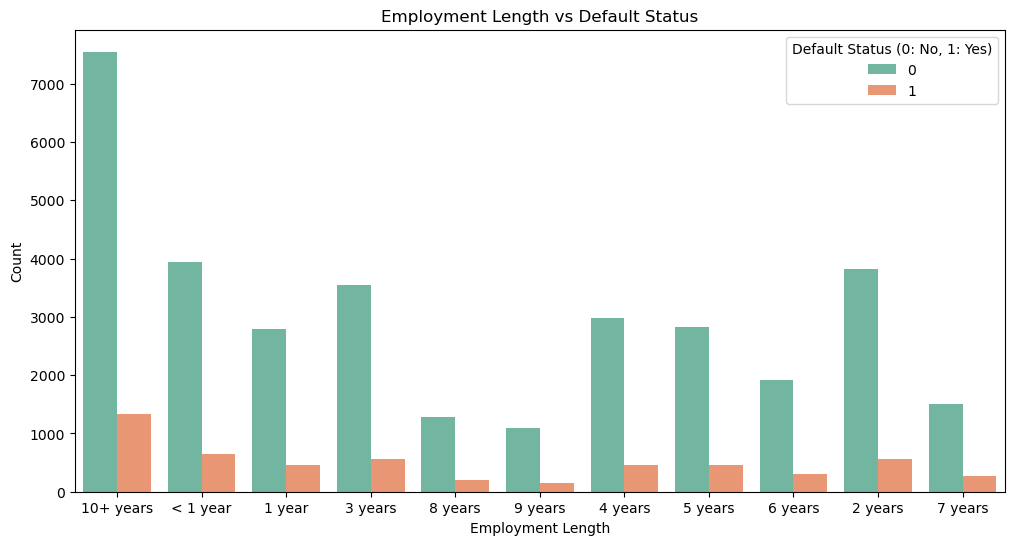

In [61]:
plt.figure(figsize=(12, 6))

# Create a countplot for emp_length with default status as hue
sns.countplot(x='emp_length', hue='is_default', data=loan_data, palette="Set2")
plt.title("Employment Length vs Default Status")
plt.xlabel("Employment Length")
plt.ylabel("Count")
plt.legend(title="Default Status (0: No, 1: Yes)")
plt.show()




## 4. Home Ownership:



#### Most borrowers rent or have a mortgage; very few own their homes outright.

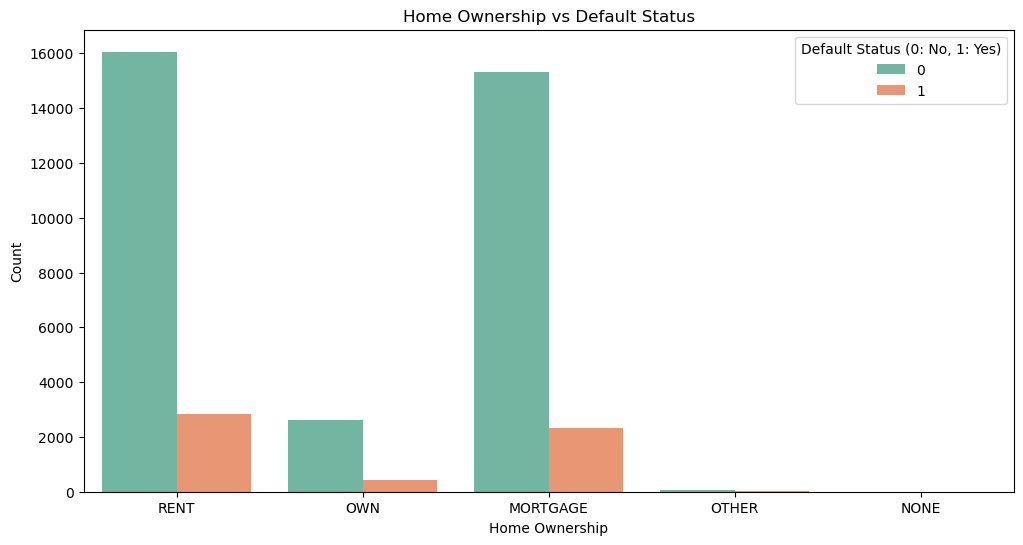


Default Rates by Home Ownership (%):
home_ownership
MORTGAGE    13.177417
NONE         0.000000
OTHER       18.367347
OWN         14.486593
RENT        15.021959
Name: is_default, dtype: float64


In [64]:
# Analyze Home Ownership vs Default Status
plt.figure(figsize=(12, 6))
sns.countplot(x='home_ownership', hue='is_default', data=loan_data, palette="Set2")
plt.title("Home Ownership vs Default Status")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title="Default Status (0: No, 1: Yes)")
plt.show()

# Default rates by Home Ownership
home_ownership_default_rate = loan_data.groupby('home_ownership')['is_default'].mean() * 100
print("\nDefault Rates by Home Ownership (%):")
print(home_ownership_default_rate)


Home Ownership:
Default Rates:

Borrowers who Rent: 15.02%

Borrowers with Mortgage: 13.18%

Borrowers who Own homes: 14.49%

Very few loans with "Other" or "None" status.

Renters have slightly higher default rates than those with mortgages or owned homes.



## 5. Purpose:

#### Top purposes include "Debt Consolidation", "Credit Card", and "Other".


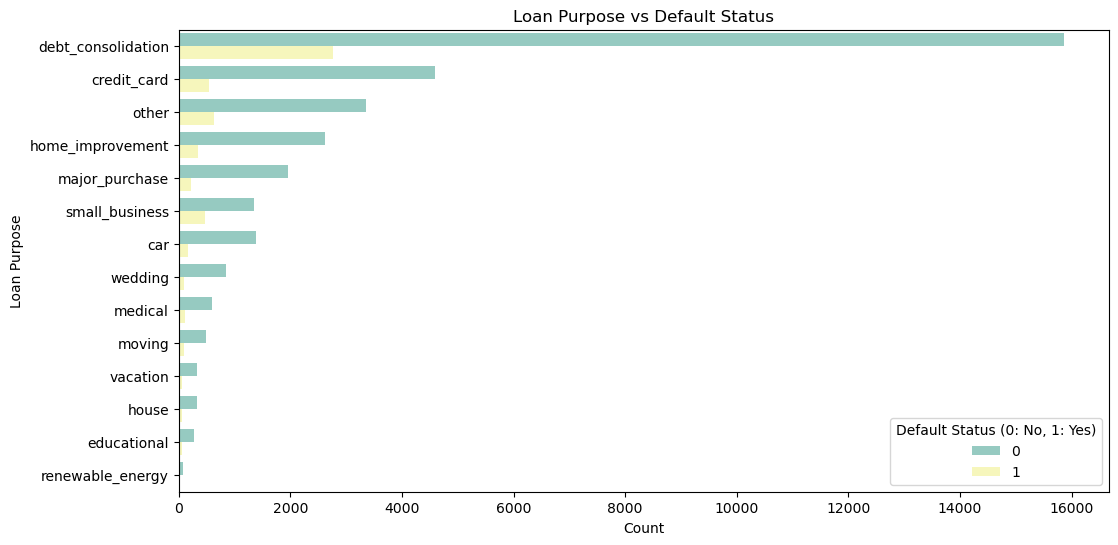


Default Rates by Loan Purpose (%):
purpose
small_business        25.984683
renewable_energy      18.446602
educational           17.230769
other                 15.852742
moving                15.780446
house                 15.485564
medical               15.295815
debt_consolidation    14.843624
vacation              13.910761
home_improvement      11.659946
credit_card           10.565302
car                   10.329245
major_purchase        10.150892
wedding               10.137276
Name: is_default, dtype: float64


In [65]:

# Analyze Purpose vs Default Status
plt.figure(figsize=(12, 6))
sns.countplot(y='purpose', hue='is_default', data=loan_data, order=loan_data['purpose'].value_counts().index, palette="Set3")
plt.title("Loan Purpose vs Default Status")
plt.xlabel("Count")
plt.ylabel("Loan Purpose")
plt.legend(title="Default Status (0: No, 1: Yes)")
plt.show()

# Default rates by Purpose
purpose_default_rate = loan_data.groupby('purpose')['is_default'].mean() * 100
print("\nDefault Rates by Loan Purpose (%):")
print(purpose_default_rate.sort_values(ascending=False))

### 2. Purpose:
#### Top Purposes:
Debt Consolidation: Most frequent purpose, with a 14.84% default rate.
    
Credit Card: Default rate is 10.57%.
    
Other: Default rate is 15.85%.
    
##### Highest Default Rates:
    
Small Business: 25.98%.
    
Renewable Energy: 18.45%.
    
Educational: 17.23%.


## 6. Verification Status:

#### About half of loans are "Verified" or "Source Verified".

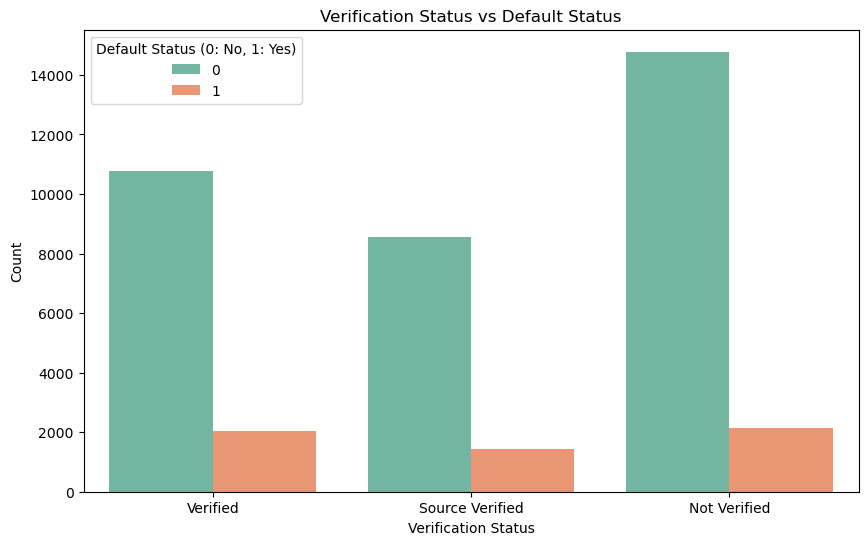


Default Rates by Verification Status (%):
verification_status
Not Verified       12.658826
Source Verified    14.358666
Verified           16.012179
Name: is_default, dtype: float64


In [67]:

# Analyze Verification Status vs Default Status
plt.figure(figsize=(10, 6))
sns.countplot(x='verification_status', hue='is_default', data=loan_data, palette="Set2")
plt.title("Verification Status vs Default Status")
plt.xlabel("Verification Status")
plt.ylabel("Count")
plt.legend(title="Default Status (0: No, 1: Yes)")
plt.show()

# Default rates by Verification Status
verification_status_default_rate = loan_data.groupby('verification_status')['is_default'].mean() * 100
print("\nDefault Rates by Verification Status (%):")
print(verification_status_default_rate)

### Verification Status:
#### - Not Verified: Default rate is 12.66%.
#### - Source Verified: Default rate is 14.36%.
#### - Verified: Default rate is 16.01%.

Loans with full verification show higher default rates, potentially reflecting higher-risk loans requiring additional scrutiny.


## 7. Loan Term:

#### Most loans are for 36 months, with fewer opting for 60 months.

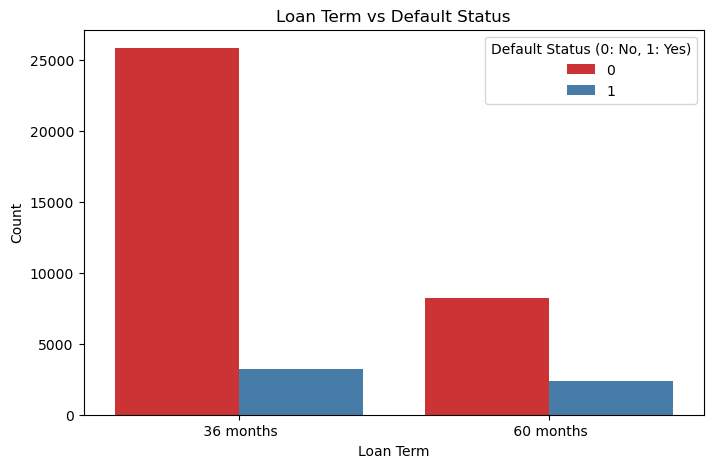


Default Rates by Loan Term (%):
term
 36 months    11.090872
 60 months    22.596742
Name: is_default, dtype: float64


In [69]:
# Analyze Loan Term vs Default Status
plt.figure(figsize=(8, 5))
sns.countplot(x='term', hue='is_default', data=loan_data, palette="Set1")
plt.title("Loan Term vs Default Status")
plt.xlabel("Loan Term")
plt.ylabel("Count")
plt.legend(title="Default Status (0: No, 1: Yes)")
plt.show()

# Default rates by Loan Term
term_default_rate = loan_data.groupby('term')['is_default'].mean() * 100
print("\nDefault Rates by Loan Term (%):")
print(term_default_rate)


### Loan Term:

#### 36 Months: Default rate is 11.09%.
#### 60 Months: Default rate is significantly higher at 22.60%.

Longer loan terms carry substantially greater default risk.